In [1]:
# Steph Curry Stats along with Shooting Visualization
# Thanks to rockstar data scientist Mr. Brad Fay
# Cheers!

import goldsberry.game
import goldsberry.league
import goldsberry
import goldsberry.player
import goldsberry.team
import goldsberry.draft
import goldsberry.playtype
import goldsberry.sportvu
from goldsberry.player._Player2 import PlayerList
from goldsberry.game._Game2 import GameIDs
import pandas as pd
import numpy as np
from scipy.stats import binned_statistic_2d
import seaborn as sns
from bokeh.plotting import figure
from math import pi
%matplotlib inline
import urllib
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc
pd.set_option("display.max_columns", 50)
pd.options.mode.chained_assignment = None 
urllib.__version__
goldsberry.__version__

'0.8.0.1'

In [2]:
players = goldsberry.PlayerList()
players2015 = pd.DataFrame(players.players())
players2015.head()

,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,FROM_YEAR,GAMES_PLAYED_FLAG,PERSON_ID,PLAYERCODE,ROSTERSTATUS,TEAM_ABBREVIATION,TEAM_CITY,TEAM_CODE,TEAM_ID,TEAM_NAME,TO_YEAR
0,Quincy Acy,"Acy, Quincy",2012,Y,203112,quincy_acy,1,SAC,Sacramento,kings,1610612758,Kings,2015
1,Jordan Adams,"Adams, Jordan",2014,Y,203919,jordan_adams,1,MEM,Memphis,grizzlies,1610612763,Grizzlies,2015
2,Steven Adams,"Adams, Steven",2013,Y,203500,steven_adams,1,OKC,Oklahoma City,thunder,1610612760,Thunder,2015
3,Arron Afflalo,"Afflalo, Arron",2007,Y,201167,arron_afflalo,1,NYK,New York,knicks,1610612752,Knicks,2015
4,Alexis Ajinca,"Ajinca, Alexis",2008,Y,201582,alexis_ajinca,1,NOP,New Orleans,pelicans,1610612740,Pelicans,2015


In [3]:
players.GET_raw_data()

In [4]:
players.api_params

{'IsOnlyCurrentSeason': '1', 'LeagueID': '00', 'Season': '2015-16'}

In [5]:
players.SET_parameters(IsOnlyCurrentSeason = 0)
players.GET_raw_data()
playersAllTime = pd.DataFrame(players.players())
playersAllTime.head()

,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,FROM_YEAR,GAMES_PLAYED_FLAG,PERSON_ID,PLAYERCODE,ROSTERSTATUS,TEAM_ABBREVIATION,TEAM_CITY,TEAM_CODE,TEAM_ID,TEAM_NAME,TO_YEAR
0,Alaa Abdelnaby,"Abdelnaby, Alaa",1990,Y,76001,HISTADD_alaa_abdelnaby,0,,,,0,,1994
1,Zaid Abdul-Aziz,"Abdul-Aziz, Zaid",1968,Y,76002,HISTADD_zaid_abdul-aziz,0,,,,0,,1977
2,Kareem Abdul-Jabbar,"Abdul-Jabbar, Kareem",1969,Y,76003,HISTADD_kareem_abdul-jabbar,0,,,,0,,1988
3,Mahmoud Abdul-Rauf,"Abdul-Rauf, Mahmoud",1990,Y,51,HISTADD_mahmoud_abdul-rauf,0,,,,0,,2000
4,Tariq Abdul-Wahad,"Abdul-Wahad, Tariq",1997,Y,1505,tariq_abdul-wahad,0,,,,0,,2003


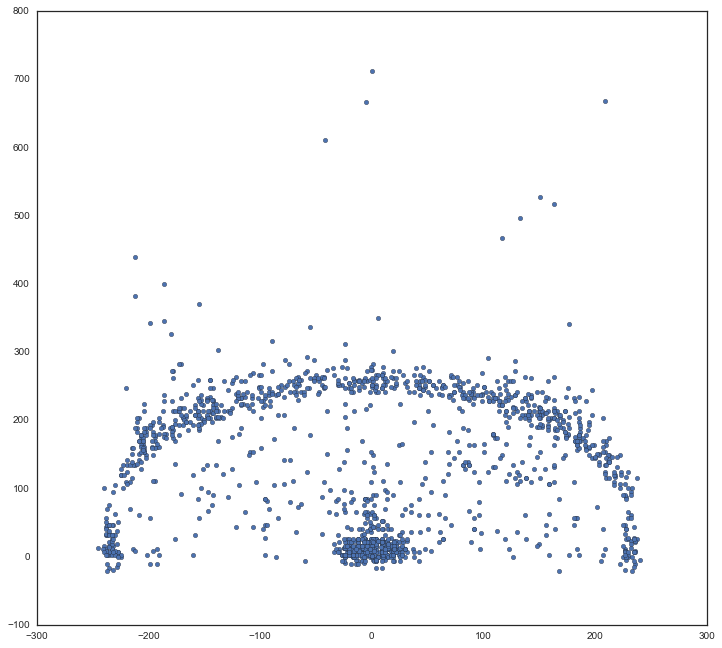

In [6]:
#Curry

players2015.ix[players2015['DISPLAY_LAST_COMMA_FIRST'].str.contains("Curry")]

curry_id = '201939'

curry_game_logs = goldsberry.player.game_logs(curry_id)

curry_game_logs_2015 = pd.DataFrame(curry_game_logs.logs())

curry_game_logs_2015.head()

curry_shots = goldsberry.player.shot_chart(curry_id)

curry_shots = pd.DataFrame(curry_shots.chart())

sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
plt.scatter(curry_shots.LOC_X, curry_shots.LOC_Y)
plt.show()

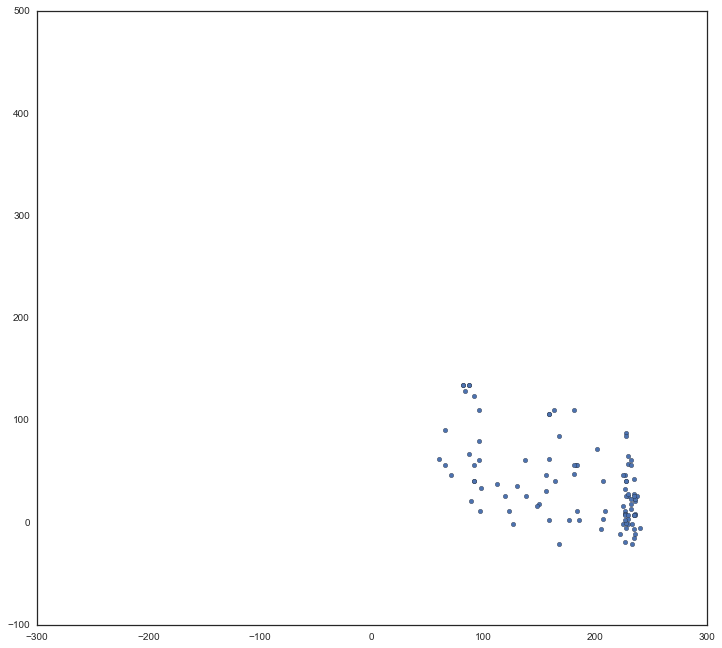

In [7]:
#Shots from the right side
right = curry_shots[curry_shots.SHOT_ZONE_AREA == "Right Side(R)"]
plt.figure(figsize=(12,11))
plt.scatter(right.LOC_X, right.LOC_Y)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

In [ ]:
#Shots from the left side
left = curry_shots[curry_shots.SHOT_ZONE_AREA == "Left Side(L)"]
plt.figure(figsize=(12,11))
plt.scatter(left.LOC_X, left.LOC_Y)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

plt.figure(figsize=(12,11))
plt.scatter(curry_shots.LOC_X, curry_shots.LOC_Y)
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(300,-300)
plt.show()

In [ ]:
plt.figure(figsize=(12,11))
plt.scatter(curry_shots.LOC_X, curry_shots.LOC_Y)
draw_court()

# Adjust plot limits to just fit in half court
plt.xlim(-300,300)
# Descending values along th y axis from bottom to top
# in order to place the hoop by the top of plot
plt.ylim(422.5, -47.5)
# get rid of axis tick labels
# plt.tick_params(labelbottom=False, labelleft=False)
plt.show()